### Рассчет метрик классификации:
`accuracy`, `precision`, `recall`, `f1_score`.

In [1]:
import numpy as np #для матричных вычислений
import pandas as pd #для анализа и предобработки данных
import matplotlib.pyplot as plt #для визуализации
import seaborn as sns #для визуализации 
from sklearn import linear_model
from sklearn import metrics #метрики


import warnings # для игнорирования предупреждений
#Игнорируем предупреждения
warnings.filterwarnings('ignore')


# Устанавливаем стиль визуализаций в matplotlib
%matplotlib inline
plt.style.use('seaborn-v0_8')

In [2]:
diabetes_data = pd.read_csv('data/diabetes_cleaned.csv')
diabetes_data.head()
df = diabetes_data.copy()
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,98.0,58.0,33.0,34.0,0.430,43,0
1,2,112.0,75.0,32.0,35.7,0.148,21,0
2,2,108.0,64.0,29.0,30.8,0.158,21,0
3,8,107.0,80.0,29.0,24.6,0.856,34,0
4,7,136.0,90.0,29.0,29.9,0.210,50,0


In [3]:
df.shape # размер таблицы

(757, 8)

<Axes: >

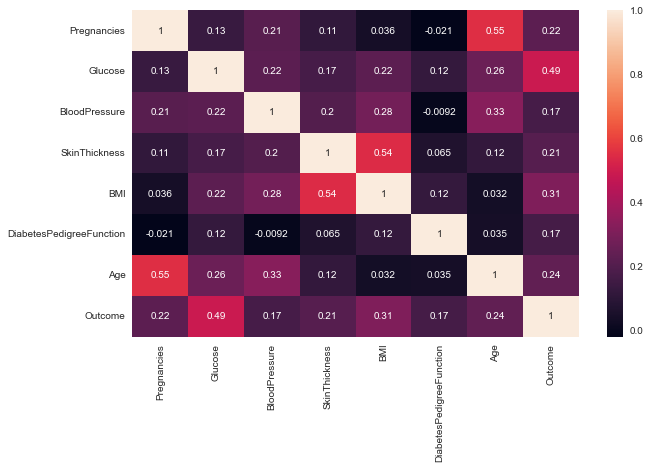

In [4]:
# тепловая карта корреляции
fig, ax = plt.subplots(figsize = (10, 6))
sns.heatmap(df.corr(), annot=True)

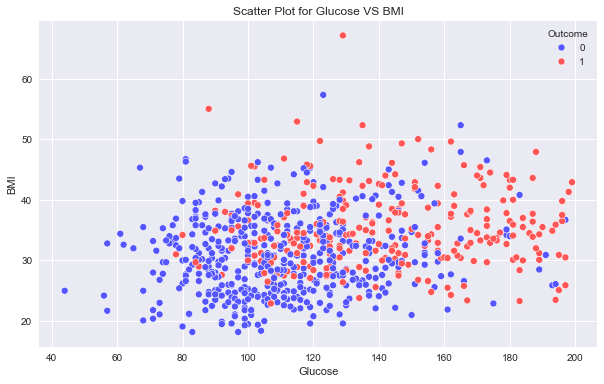

In [5]:
# диаграмма рессеяния Уровень глюкозы к Индексу массы тела
fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(
    data=df, # дата-сет
    x='Glucose', # ось Х
    y='BMI', # ось Y
    hue='Outcome', # по какому признаку группировка
    palette='seismic', # палитра
    ax=ax # координатная плоскость
)
ax.set_title('Scatter Plot for Glucose VS BMI'); # наименование графика

Разделяем выборку на матрицу наблюдений $X$, состоящую из двух признаков, и столбец с правильным ответами $y$

In [6]:
X = df[['Glucose', 'BMI']]
y = df['Outcome']

In [7]:
# создаем объект класса LogisticRegression
log_reg_2d = linear_model.LogisticRegression(random_state=42)

# обучаем модель, минимизируем logloss
log_reg_2d.fit(X, y)

print(f'w0: {log_reg_2d.intercept_}') # коеффициент W0
print(f'w1, w2: {log_reg_2d.coef_}') # коеффициенты W1 и W2

w0: [-8.24898965]
w1, w2: [[0.03779275 0.0875742 ]]


In [8]:
#Загрузим значения концентрации глюкозы и индекса массы тела для пациента
X_new = pd.DataFrame({'Glucose': [180], 'BMI': [51]})
#Делаем предсказание вероятностей:
y_new_predict_proba = log_reg_2d.predict_proba(X_new)
print(f'Predicted probabilities:{np.round(y_new_predict_proba, 2)}')

# вероятность отнесения объекта к классу 0 равна 5%
# вероятность отнесения объекта к классу 1 равна 95%
# сумма вероятностей всегда равна 1
# с вероятностью 95% пациент болеет диабетом

Predicted probabilities:[[0.05 0.95]]


Метод $predict$ возвращает пренадлежность к классу 0 или 1

In [9]:
#Загрузим значения концентрации глюкозы и индекса массы тела для пациента
X_new_pred = pd.DataFrame({'Glucose': [180], 'BMI': [51]})
#Делаем предсказание вероятностей:
y_new_predict = log_reg_2d.predict(X_new_pred)
print(f'Predicted probabilities:{y_new_predict}')

# функция вернула значение 1 - значит функция предсказания показывает, что пациент с данными признаками болен диабетом

Predicted probabilities:[1]


Визулизируем модель через созданную функцию plot_probabilities_2d()<br>
Данная функция принимает три аргумента:
- X — матрица с наблюдениями,
- y — столбец с правильными ответами,
- model — модель, с помощью которой делается предсказание вероятностей

In [10]:
#Функция для визуализации модели
def plot_probabilities_2d(X, y, model):
    #Генерируем координатную сетку из всех возможных значений для признаков
    #Glucose изменяется от x1_min = 44 до x2_max = 199, 
    #BMI — от x2_min = 18.2 до x2_max = 67.1
    #Результат работы функции — два массива xx1 и xx2, которые образуют координатную сетку
    xx1, xx2 = np.meshgrid(
        np.arange(X.iloc[:, 0].min()-1, X.iloc[:, 0].max()+1, 0.1),
        np.arange(X.iloc[:, 1].min()-1, X.iloc[:, 1].max()+1, 0.1)
    )
    #Вытягиваем каждый из массивов в вектор-столбец — reshape(-1, 1)
    #Объединяем два столбца в таблицу с помощью hstack
    X_net = np.hstack([xx1.reshape(-1, 1), xx2.reshape(-1, 1)])
    #Предсказываем вероятность для всех точек на координатной сетке
    #Нам нужна только вероятность класса 1
    probs = model.predict_proba(X_net)[:, 1]
    #Переводим столбец из вероятностей в размер координатной сетки
    probs = probs.reshape(xx1.shape)
    #Создаём фигуру и координатную плоскость
    fig, ax = plt.subplots(figsize = (15, 8))
    #Рисуем тепловую карту вероятностей
    contour = ax.contourf(xx1, xx2, probs, 100, cmap='bwr')
    #Рисуем разделяющую плоскость — линию, где вероятность равна 0.5
    bound = ax.contour(xx1, xx2, probs, [0.5], linewidths=2, colors='black');
    #Добавляем цветовую панель 
    colorbar = fig.colorbar(contour)
    #Накладываем поверх тепловой карты диаграмму рассеяния
    sns.scatterplot(x=X.iloc[:, 0], y=X.iloc[:, 1], hue=y, palette='seismic', ax=ax)
    #Даём графику название
    ax.set_title('Scatter Plot with Decision Boundary');
    #Смещаем легенду в верхний левый угол вне графика
    ax.legend(bbox_to_anchor=(-0.05, 1))

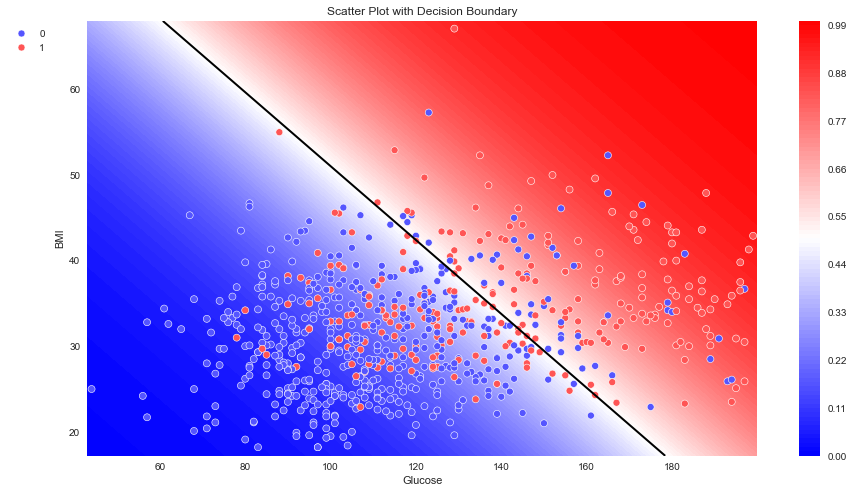

In [11]:
# визуализация модели на двух признаках Glucose & BMI
plot_probabilities_2d(X, y, log_reg_2d)

### Создадим модель, используя все признаки датасета

In [12]:
#Создаём матрицу признаков X и столбец с вектором правильных ответов y
X_full = df.drop('Outcome', axis=1)
y_full = df['Outcome']

In [13]:
#Создаём объект класса LogisticRegression
log_reg_full = linear_model.LogisticRegression(random_state=42, max_iter=1000)
#Обучаем модель, минимизируя logloss
log_reg_full.fit(X_full, y_full)
#Делаем предсказание класса методом predict
y_pred_full = log_reg_full.predict(X_full)

Добавим предсказание в таблицу X

In [14]:
#Создадим временную таблицу X_full_temp
X_full_temp = X_full.copy()
#Добавим в эту таблицу результат предсказания
X_full_temp['Prediction'] = y_pred_full
X_full_temp.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Prediction
752,5,139.0,64.0,35.0,28.6,0.411,26,0
753,1,96.0,122.0,29.0,22.4,0.207,27,0
754,10,101.0,86.0,37.0,45.6,1.136,38,1
755,0,141.0,72.0,29.0,42.4,0.205,29,1
756,0,125.0,96.0,29.0,22.5,0.262,21,0


## Метрики классификации

Создадим матрицы ошибок для моделей `log_reg_2d` и `log_reg_full`

In [15]:
from sklearn import metrics #метрики

In [16]:
#Делаем предсказание моделью, обученной на двух признаках
y_pred1 = log_reg_2d.predict(df[['Glucose', 'BMI']])

#Делаем предсказание моделью, обученной на всех признаках
y_pred2 = log_reg_full.predict(df.drop('Outcome', axis=1))

In [17]:
# Строим матрицы ошибок для каждой модели в виде тепловых карт
confusion_matrix1 = metrics.confusion_matrix(y, y_pred1)
confusion_matrix2 = metrics.confusion_matrix(y, y_pred2)

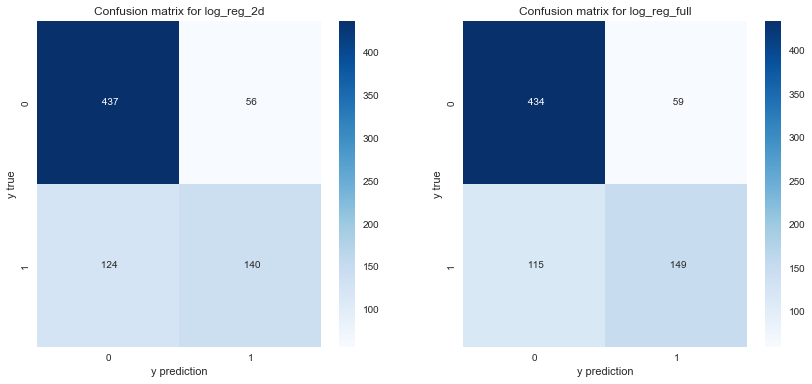

In [18]:
# Визуализируем матрицы
fig, axes = plt.subplots(1, 2, figsize=(14, 6)) # создали фигуру и две координатные плоскости

# строим тепловую карту для матрицы 1
sns.heatmap(confusion_matrix1, annot=True, fmt=' ', ax=axes[0], cmap='Blues')
axes[0].set_title('Confusion matrix for log_reg_2d') # наименование матрицы
axes[0].set_xlabel('y prediction') # наименование оси абсцисс
axes[0].set_ylabel('y true') # наименование оси ординат

## строим тепловую карту для матрицы 2
sns.heatmap(confusion_matrix2, annot=True, fmt=' ', ax=axes[1], cmap='Blues')
axes[1].set_title('Confusion matrix for log_reg_full') # наименование матрицы
axes[1].set_xlabel('y prediction') # наименование оси абсцисс
axes[1].set_ylabel('y true'); # наименование оси ординат

Расчет метрик для модели `log_reg_2d`

In [19]:
print(f'Accuracy: {metrics.accuracy_score(y, y_pred1):.2f}')
print(f'Precision: {metrics.precision_score(y, y_pred1):.2f}')
print(f'Recall: {metrics.recall_score(y, y_pred1):.2f}')
print(f'F1 score: {metrics.f1_score(y, y_pred1):.2f}')

Accuracy: 0.76
Precision: 0.71
Recall: 0.53
F1 score: 0.61


Расчет метрик для модели `log_reg_full`

In [20]:
print(f'Accuracy: {metrics.accuracy_score(y, y_pred2):.2f}')
print(f'Precision: {metrics.precision_score(y, y_pred2):.2f}')
print(f'Recall: {metrics.recall_score(y, y_pred2):.2f}')
print(f'F1 score: {metrics.f1_score(y, y_pred2):.2f}')

Accuracy: 0.77
Precision: 0.72
Recall: 0.56
F1 score: 0.63


* $Accuracy$: доля правильных ответов для первой модели составляет 0.76, для второй - 0.77
* $Precision$: способность модели отделять больных пациентов от здоровых составляет 0.71, а второй - 0.72 (не совершать ошибки I рода)
* $Recall$: обобщающая способность находить больных пациентов среди всех пациентов для перовй модели - 0.53, я для второй - 0.56 (не совершать ошибки II рода)
* $F1_score$: среднее гармоническое между $Precision$ и $Recall$ для первой модели составляет 0.61, а для второй - 0.63

Для возврата всех метрик по каждому классу (0 и 1) одной строкой - `classification_report()`

In [21]:
print(metrics.classification_report(y, y_pred2))

              precision    recall  f1-score   support

           0       0.79      0.88      0.83       493
           1       0.72      0.56      0.63       264

    accuracy                           0.77       757
   macro avg       0.75      0.72      0.73       757
weighted avg       0.76      0.77      0.76       757



Улучшаем метрики `precision`, `recall` и `F1`.
<br>Будем изменять порог принятия решения от 0,1 до 1 с шагом 0,05.
<br>Сделаем предсказание на модели `log_reg_full` В цикле будем определять класс пациента, изменяя порог принятия решения и визуализируем изменение метрик на графике. После чего выберем оптимальный порог принятия решения.
Такой метод подбора порога принятия решения называется Геометрическая регулировка порога вероятности для логистической регресии (двигаем разделяющую плоскость)

In [36]:
# Считаем вероятности наличия диабета для каждого из пациентов
y_proba_pred = log_reg_full.predict_proba(diabetes_data.drop('Outcome', axis=1)) [:, 1] #оставляем второй столбец с вероятностью первого класса

In [38]:
# Из numpy-массива сформируем Pandas Series
y_proba_pred = pd.Series(y_proba_pred)


In [43]:
# Создадим списки, в которых сохраним все варианты метрик с учетом изменения порога
recall_score = []
precision_score = []
f1_score = []

# Генерируем набор верятностных порогов в диапазоне от 0.1 до 1
thresholds = np.arange(0.1, 1, 0.05)

# В цикле переберем все вероятности и сформируем все метрики по каждой вероятности
for i in thresholds:
    # Пациентов, для которых вероятность наличия диабета > i, относим к классу 1
    # В противном случае - к классу 0
    
    y_pred = y_proba_pred.apply(lambda x: 1 if x > i else 0)
    
    # Считаем метрики и добавляем их в списки
    recall_score.append(metrics.recall_score(y, y_pred))
    precision_score.append(metrics.precision_score(y, y_pred))
    f1_score.append(metrics.f1_score(y, y_pred))

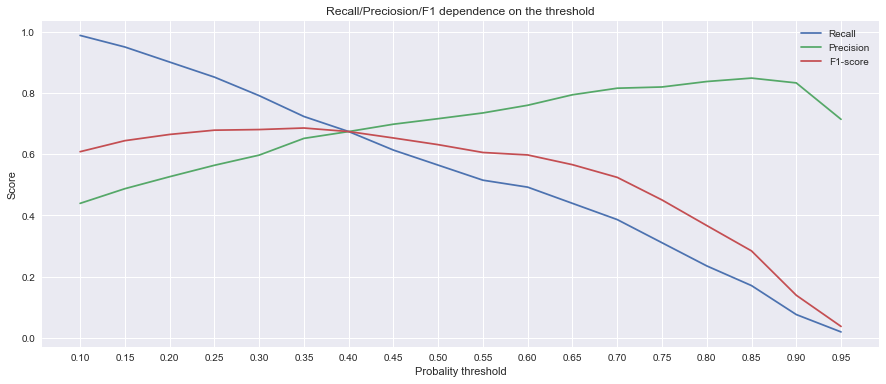

In [60]:
# Визуализируем метрики при различных threshold
fig, ax = plt.subplots(figsize=(15, 6)) # фигура и координатная плоскость

# Строим линейный график зависимости recall от threshold
ax.plot(thresholds, recall_score, label='Recall')
# Строим линейный график зависимости precision от threshold
ax.plot(thresholds, precision_score, label='Precision')
# Строим линейный график зависимости f1_score от threshold
ax.plot(thresholds, f1_score, label='F1-score')

# Наименование графика и осей
ax.set_title('Recall/Preciosion/F1 dependence on the threshold')
ax.set_xlabel('Probality threshold')
ax.set_ylabel('Score')

# Устанавливаем отметки по оси Х
ax.set_xticks(thresholds)
# Легенда
ax.legend();
plt.show()

В точке 0,4 все метрки пересекаются, т.е. precision и recall сравниваются, а F1 имеет максимальное значение в точке 0,35.
<br>В зависимости от того, что нам важнее precision или recall мы можем выбирать порог принятия решения.
<br>Выберем порог 0,4

In [61]:
# задаем оптимальный порог принятия решения
thresholds_opt = 0.4
#Пациентов, для которых вероятность наличия диабета > 0.4, отнесем к классу 1, в противном случае к классу 0
y_pred_opt = y_proba_pred.apply(lambda x: 1 if x > thresholds_opt else 0)

# Считаем метрики
print(metrics.classification_report(y, y_pred_opt))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83       493
           1       0.67      0.67      0.67       264

    accuracy                           0.77       757
   macro avg       0.75      0.75      0.75       757
weighted avg       0.77      0.77      0.77       757



Задание 3.6
<br> Определить метрики `precision`, `recall` и `F1`.

In [63]:
y_true = [0, 0, 1, 1, 1, 1, 0, 1] # правильные классы
y_pred = [0, 1, 0, 0, 1, 1, 0, 1] # предсказанные классы
print(metrics.classification_report(y_true, y_pred)) # вывод всех метрик

              precision    recall  f1-score   support

           0       0.50      0.67      0.57         3
           1       0.75      0.60      0.67         5

    accuracy                           0.62         8
   macro avg       0.62      0.63      0.62         8
weighted avg       0.66      0.62      0.63         8



In [64]:
print(f'Accuracy: {metrics.accuracy_score(y_true, y_pred):.2f}')
print(f'Precision: {metrics.precision_score(y_true, y_pred):.2f}')
print(f'Recall: {metrics.recall_score(y_true, y_pred):.2f}')
print(f'F1 score: {metrics.f1_score(y_true, y_pred):.2f}')

Accuracy: 0.62
Precision: 0.75
Recall: 0.60
F1 score: 0.67
